<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [85]:
#!pip install scikit-learn==0.23.1

In [86]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])
await piplite.install(['scipy'])

ModuleNotFoundError: No module named 'piplite'

In [87]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


import pylab as pl

import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [88]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [89]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'

### Load Data From CSV File


In [90]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [91]:
df.shape

(346, 10)

### Convert to date time object


In [92]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [93]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [94]:
# notice: installing seaborn might takes a few minutes
!pip install seaborn

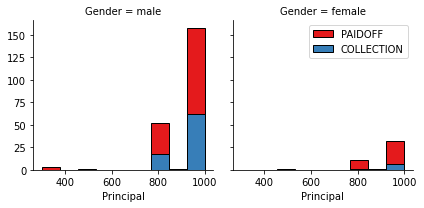

In [95]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

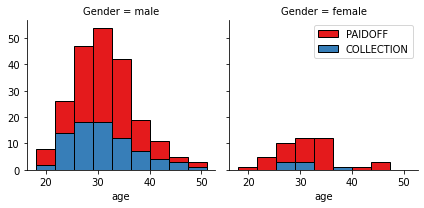

In [96]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


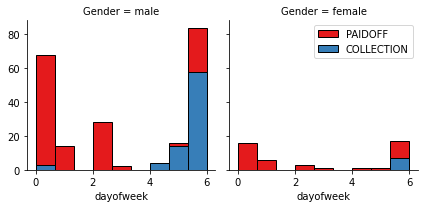

In [97]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [98]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [99]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [100]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [101]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [362]:
Feature = df[['loan_status','Principal','terms','age','Gender', 'dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,loan_status,Principal,terms,age,Gender,dayofweek,Bechalor,High School or Below,college
0,0,1000,30,45,0,3,0,1,0
1,0,1000,30,33,1,3,1,0,0
2,0,1000,15,27,0,3,0,0,1
3,0,1000,30,28,1,4,0,0,1
4,0,1000,30,29,0,4,0,0,1


### Feature Selection


Let's define feature sets, X:


In [380]:
X = Feature[['Principal', 'terms','age', 'Gender', 'dayofweek', 'Bechalor', 'High School or Below', 'college']] .values  #.astype(float)
X[0:5]


array([[1000,   30,   45,    0,    3,    0,    1,    0],
       [1000,   30,   33,    1,    3,    1,    0,    0],
       [1000,   15,   27,    0,    3,    0,    0,    1],
       [1000,   30,   28,    1,    4,    0,    0,    1],
       [1000,   30,   29,    0,    4,    0,    0,    1]], dtype=int64)

What are our lables?


In [381]:
y = Feature['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [382]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -0.26, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -0.26,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -0.26, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.12, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.12, -0.38, -0.88,  1.15]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [394]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [395]:
#The algorithm with k=4
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [396]:
#Predictions on the test set
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [397]:
#Accuracy when k=4
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7892561983471075
Test set Accuracy:  0.7980769230769231


ACCURACY OF KNN for different values of k.

In [398]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.72, 0.76, 0.77, 0.8 , 0.76, 0.78, 0.73, 0.75, 0.72])

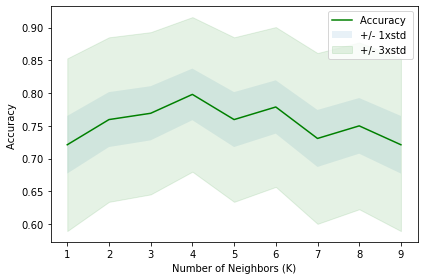

In [399]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [400]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7980769230769231 with k= 4


# Decision Tree


In [401]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
#create an instance of the DecisionTreeClassifier called DefaultPay.
DefaultPay = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DefaultPay # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [402]:
#fit the data with the training feature matrix X_train and training response vector y_train
DefaultPay.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [403]:
#predictions on the testing dataset and storing it into a variable called predTree.
predTree = DefaultPay.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 0 0 0 0]


In [404]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7403846153846154


##ACCURACY OF 0.74 MIGHT BE BETTER. In order to improve model i will try to change feature selection.##

In [405]:
Feature = df[['loan_status','Principal','terms','age','Gender', 'dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,loan_status,Principal,terms,age,Gender,dayofweek,Bechalor,High School or Below,college
0,0,1000,30,45,0,3,0,1,0
1,0,1000,30,33,1,3,1,0,0
2,0,1000,15,27,0,3,0,0,1
3,0,1000,30,28,1,4,0,0,1
4,0,1000,30,29,0,4,0,0,1


In [487]:
X = Feature[['Gender', 'age', 'dayofweek', 'Bechalor', 'High School or Below', 'college']] .values  #.astype(float)
X[0:5]

array([[ 0, 45,  3,  0,  1,  0],
       [ 1, 33,  3,  1,  0,  0],
       [ 0, 27,  3,  0,  0,  1],
       [ 1, 28,  4,  0,  0,  1],
       [ 0, 29,  4,  0,  0,  1]], dtype=int64)

In [488]:
y = Feature['loan_status']
y [0:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [502]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (224, 6) (224,)
Test set: (122, 6) (122,)


In [503]:
DefaultPay = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DefaultPay # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [504]:
DefaultPay.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [505]:
predTree = DefaultPay.predict(X_test)

In [506]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
63     0
34     0
186    0
146    0
130    0
Name: loan_status, dtype: int64


In [507]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7540983606557377


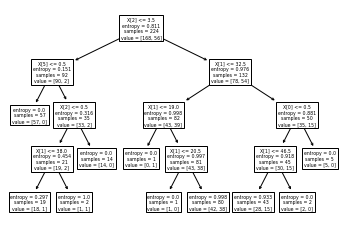

In [508]:
tree.plot_tree(DefaultPay)
plt.show()

##After X-features were changed and test setting were - 'test_size=0.35, random_state=4',  Accuracy increased to 0.75.##

In [556]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5882352941176471

In [557]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6535947712418302

# Support Vector Machine


In [250]:
Feature = df[['loan_status','dayofweek', 'age', 'Gender', 'terms', 'Principal']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,loan_status,dayofweek,age,Gender,terms,Principal,Bechalor,High School or Below,college
0,PAIDOFF,3,45,0,30,1000,0,1,0
1,PAIDOFF,3,33,1,30,1000,1,0,0
2,PAIDOFF,3,27,0,15,1000,0,0,1
3,PAIDOFF,4,28,1,30,1000,0,0,1
4,PAIDOFF,4,29,0,30,1000,0,0,1


In [251]:
Feature['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
Feature.head()

,loan_status,dayofweek,age,Gender,terms,Principal,Bechalor,High School or Below,college
0,0,3,45,0,30,1000,0,1,0
1,0,3,33,1,30,1000,1,0,0
2,0,3,27,0,15,1000,0,0,1
3,0,4,28,1,30,1000,0,0,1
4,0,4,29,0,30,1000,0,0,1


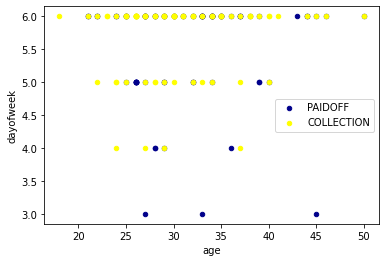

In [249]:
ax = Feature[Feature['loan_status'] == 0][0:80].plot(kind='scatter', x='age', y='dayofweek', color='DarkBlue', label='PAIDOFF');
Feature[Feature['loan_status'] == 1][0:80].plot(kind='scatter', x='age', y='dayofweek', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

In [165]:
Feature.dtypes

loan_status             int64
dayofweek               int64
age                     int64
Gender                  int64
Bechalor                uint8
High School or Below    uint8
college                 uint8
dtype: object

In [182]:
Feature['Bechalor'] = Feature['Bechalor'].astype('int')
Feature['High School or Below'] = Feature['High School or Below'].astype('int')
Feature['college'] = Feature['college'].astype('int')
Feature.dtypes

loan_status             int64
dayofweek               int64
age                     int64
Gender                  int64
Bechalor                int32
High School or Below    int32
college                 int32
dtype: object

In [252]:
feature_df = Feature[['loan_status', 'dayofweek', 'age', 'Gender', 'Bechalor', 'High School or Below', 'college']]
X = np.asarray(feature_df)
X[0:5]

array([[ 0,  3, 45,  0,  0,  1,  0],
       [ 0,  3, 33,  1,  1,  0,  0],
       [ 0,  3, 27,  0,  0,  0,  1],
       [ 0,  4, 28,  1,  0,  0,  1],
       [ 0,  4, 29,  0,  0,  0,  1]], dtype=int64)

In [253]:
y = np.asarray(Feature['loan_status'])
y [0:300]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (231, 7) (231,)
Test set: (115, 7) (115,)


In [255]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [256]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [257]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [258]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        87
           1       0.00      0.00      0.00        28

    accuracy                           0.76       115
   macro avg       0.38      0.50      0.43       115
weighted avg       0.57      0.76      0.65       115

Confusion matrix, without normalization
[[87  0]
 [28  0]]


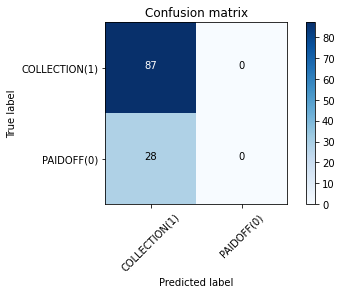

In [259]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION(1)','PAIDOFF(0)'],normalize= False,  title='Confusion matrix')

In [260]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.651657339647008

In [261]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7565217391304347

# Logistic Regression


In [226]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.58, -0.26,  2.33, -0.42, -0.38,  1.14, -0.87],
       [-0.58, -0.26,  0.34,  2.38,  2.62, -0.88, -0.87],
       [-0.58, -0.26, -0.65, -0.42, -0.38, -0.88,  1.15],
       [-0.58,  0.12, -0.49,  2.38, -0.38, -0.88,  1.15],
       [-0.58,  0.12, -0.32, -0.42, -0.38, -0.88,  1.15]])

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 7) (242,)
Test set: (104, 7) (104,)


In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [301]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [280]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.65, 0.35],
       [0.66, 0.34],
       [0.92, 0.08],
       [0.87, 0.13],
       [0.93, 0.07],
       [0.89, 0.11],
       [0.68, 0.32],
       [0.84, 0.16],
       [0.87, 0.13],
       [0.47, 0.53],
       [0.84, 0.16],
       [0.58, 0.42],
       [0.86, 0.14],
       [0.89, 0.11],
       [0.86, 0.14],
       [0.89, 0.11],
       [0.51, 0.49],
       [0.91, 0.09],
       [0.74, 0.26],
       [0.91, 0.09],
       [0.72, 0.28],
       [0.68, 0.32],
       [0.5 , 0.5 ],
       [0.55, 0.45],
       [0.66, 0.34],
       [0.62, 0.38],
       [0.6 , 0.4 ],
       [0.87, 0.13],
       [0.61, 0.39],
       [0.93, 0.07],
       [0.58, 0.42],
       [0.59, 0.41],
       [0.65, 0.35],
       [0.74, 0.26],
       [0.74, 0.26],
       [0.65, 0.35],
       [0.62, 0.38],
       [0.9 , 0.1 ],
       [0.58, 0.42],
       [0.8 , 0.2 ],
       [0.65, 0.35],
       [0.94, 0.06],
       [0.73, 0.27],
       [0.53, 0.47],
       [0.91, 0.09],
       [0.62, 0.38],
       [0.64, 0.36],
       [0.66,

In [302]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7425742574257426

In [303]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 3 24]
 [ 2 75]]


Confusion matrix, without normalization
[[ 2 13]
 [ 3 52]]


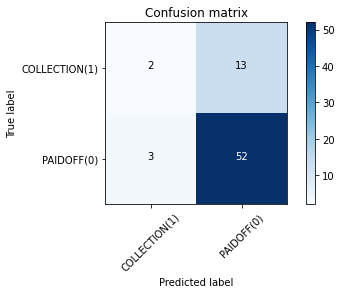

In [291]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION(1)','PAIDOFF(0)'],normalize= False,  title='Confusion matrix')

In [304]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4766811033598627

In [305]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6796875

In [555]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5882352941176471

# Model Evaluation using Test set


In [268]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [530]:
path1 = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'

### Load Test set for evaluation


In [531]:
df = pd.read_csv(path1)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [532]:
df.shape

(54, 10)

In [533]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


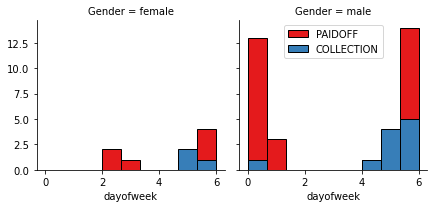

In [534]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [535]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [536]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

In [537]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [538]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

In [541]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,0,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,0,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,0,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,0,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,0,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [542]:
Feature = df[['loan_status','Principal','terms','age','Gender', 'dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

Feature.head()


,loan_status,Principal,terms,age,Gender,dayofweek,Bechalor,High School or Below,college
0,0,1000,30,50,1,3,1,0,0
1,0,300,7,35,0,4,0,0,0
2,0,1000,30,43,1,5,0,1,0
3,0,1000,30,26,0,5,0,0,1
4,0,800,15,29,0,6,1,0,0


In [543]:
X = Feature[['Principal', 'terms','age', 'Gender', 'dayofweek', 'Bechalor', 'High School or Below', 'college']] .values  #.astype(float)
X[0:5]

array([[1000,   30,   50,    1,    3,    1,    0,    0],
       [ 300,    7,   35,    0,    4,    0,    0,    0],
       [1000,   30,   43,    1,    5,    0,    1,    0],
       [1000,   30,   26,    0,    5,    0,    0,    1],
       [ 800,   15,   29,    0,    6,    1,    0,    0]], dtype=int64)

In [545]:
y = Feature['loan_status']
y [0:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [546]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5] 

array([[ 0.49,  0.93,  3.06,  1.98, -0.29,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.1 , -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.49, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.49, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.87,  2.4 , -0.8 , -0.86]])

In [547]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (37, 8) (37,)
Test set: (17, 8) (17,)


In [548]:
#The algorithm with k=4
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [549]:
#Predictions on the test set
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [550]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8648648648648649
Test set Accuracy:  0.5882352941176471


In [551]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6535947712418302

In [554]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5882352941176471

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.58    | 0.65     | NA      |
| Decision Tree      | 0.58    | 0.65     | NA      |
| SVM                | 0.75    | 0.65     | NA      |
| LogisticRegression | 0.58    | 0.67     | 0.48    |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
